# **Data Prepcessing**

In [ ]:
# Data Preprocessing

In [ ]:
# Loading and Initial Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
math_df = pd.read_csv('/content/student-mat.csv', sep=';')
por_df = pd.read_csv('/content/student-por.csv', sep=';')

# Basic information
print(f"Math dataset shape: {math_df.shape}")
print(f"Portuguese dataset shape: {por_df.shape}")

# Check for missing values
print("Missing values in Math dataset:", math_df.isnull().sum().sum())
print("Missing values in Portuguese dataset:", por_df.isnull().sum().sum())

# Summary statistics
math_df.describe()

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)
Missing values in Math dataset: 0
Missing values in Portuguese dataset: 0


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Missing Value Analysis

Missing values by column:
No missing values detected in original data

Numerical column distributions (focusing on G3 as the target variable):

G1 value distribution:
G1
3      1
4      1
5      7
6     24
7     37
8     41
9     31
10    51
11    39
12    35
13    33
14    30
15    24
16    22
17     8
18     8
19     3
Name: count, dtype: int64

G2 value distribution:
G2
0     13
4      1
5     15
6     14
7     21
8     32
9     50
10    46
11    35
12    41
13    37
14    23
15    34
16    13
17     5
18    12
19     3
Name: count, dtype: int64

G3 value distribution:
G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

Rows with G3 = 0: 38

Sample of rows with G3 = 0:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
128     GP   M   18       R     GT3       T     2     2  services    other   
130     GP   F   15    

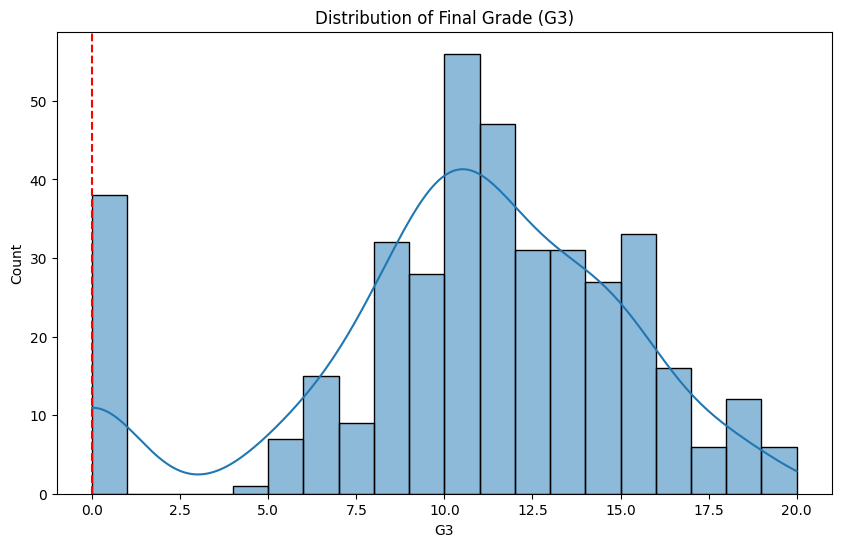

In [ ]:
# Thorough inspection of missing values in the dataset

# Check missing values in all columns
missing_values = math_df.isnull().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0] if missing_values.any() > 0 else "No missing values detected in original data")

# Analyze numerical column distributions to understand potential issues
print("\nNumerical column distributions (focusing on G3 as the target variable):")
for col in ['G1', 'G2', 'G3']:
    print(f"\n{col} value distribution:")
    print(math_df[col].value_counts().sort_index())

# Check for zeros in G3 that might represent missing data vs. actual zeros
print(f"\nRows with G3 = 0: {len(math_df[math_df['G3'] == 0])}")
if len(math_df[math_df['G3'] == 0]) > 0:
    print("\nSample of rows with G3 = 0:")
    print(math_df[math_df['G3'] == 0].head())

# Visualize G3 distribution to understand outliers and zeros
plt.figure(figsize=(10, 6))
sns.histplot(math_df['G3'], kde=True, bins=20)
plt.title('Distribution of Final Grade (G3)')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [ ]:
# Data Preparation and Handling Categorical Variables

In [ ]:
# Handling Categorical Variables

# Define categorical and numerical features
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                       'famsup', 'paid', 'activities', 'nursery', 'higher',
                       'internet', 'romantic']
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                     'failures', 'famrel', 'freetime', 'goout', 'Dalc',
                     'Walc', 'health', 'absences', 'G1', 'G2']

# Prepare preprocessing pipeline for later use in the modeling phase
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [ ]:
# Feature Engineering

In [ ]:
# Add engineered features
def engineer_features(df):
    """
    Create new features based on existing ones to potentially improve model performance.

    Args:
        df: Original dataframe

    Returns:
        DataFrame with additional engineered features
    """
    df_new = df.copy()

    # Study intensity (combining study time and travel time)
    df_new['study_intensity'] = df['studytime'] * (5 - df['traveltime'])

    # Alcohol consumption index
    df_new['alcohol_index'] = df['Dalc'] + df['Walc']

    # Parental education level
    df_new['parents_education'] = df['Medu'] + df['Fedu']

    # Academic progress (difference between G2 and G1)
    df_new['progress_G1_G2'] = df['G2'] - df['G1']

    # Free time vs. study time ratio
    # Adding a small constant (0.5) to avoid division by zero
    df_new['leisure_study_ratio'] = df['freetime'] / df['studytime'].replace(0, 0.5)

    return df_new

# Apply feature engineering to the dataset
math_df_engineered = engineer_features(math_df)

# Verify no NaN values were introduced during feature engineering
engineered_missing = math_df_engineered.isnull().sum()
print("Missing values after feature engineering:")
print(engineered_missing[engineered_missing > 0] if engineered_missing.any() > 0 else "No missing values introduced")

Missing values after feature engineering:
No missing values introduced


In [ ]:
# Target Category Creation with Validation

NaN values in G3 before categorization: 0

Grade category distribution:
G3_category
average           165
high_performer    100
at_risk            92
Name: count, dtype: int64

Grade category distribution (percentage):
G3_category
average           46.2
high_performer    28.0
at_risk           25.8
Name: proportion, dtype: float64

NaN values in G3_category: 38
Rows where G3_category is NaN:
     G3
128   0
130   0
131   0
134   0
135   0
136   0
137   0
140   0
144   0
146   0
148   0
150   0
153   0
160   0
162   0
168   0
170   0
173   0
221   0
239   0
242   0
244   0
259   0
264   0
269   0
296   0
310   0
316   0
332   0
333   0
334   0
337   0
341   0
343   0
367   0
383   0
387   0
389   0

This suggests G3 values outside our bin ranges. Let's verify:
[0]

Dropped 38 rows with G3 values outside category ranges


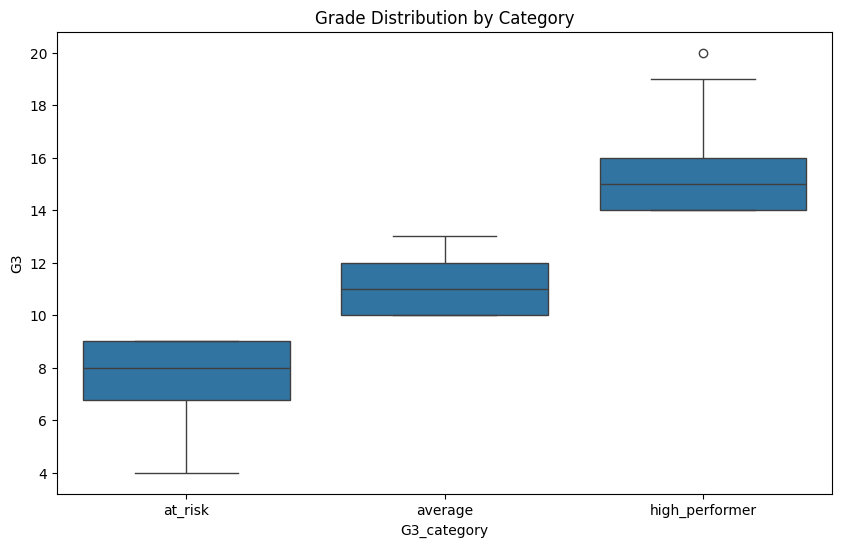

In [ ]:
# Creating Target Categories with Validation

# First, confirm G3 doesn't have NaN values before categorization
g3_nan_count = math_df_engineered['G3'].isna().sum()
print(f"NaN values in G3 before categorization: {g3_nan_count}")

if g3_nan_count > 0:
    # If there are NaN values, we need to handle them appropriately for a research setting
    print("Handling NaN values in G3...")

    # For research, document the missing data handling approach
    print("Missing G3 rows characteristics:")
    print(math_df_engineered[math_df_engineered['G3'].isna()].describe())

    # Option 1: For research purposes, we might decide to exclude these rows
    # rather than imputing values for the target variable
    math_df_clean = math_df_engineered.dropna(subset=['G3'])
    print(f"Dropped {len(math_df_engineered) - len(math_df_clean)} rows with missing G3 values")
else:
    math_df_clean = math_df_engineered

# Create the G3 category with well-defined bins
# The bins represent:
# 0-9: At risk of failing (below 10 is typically failing in many grading systems)
# 10-13: Average performance
# 14-20: High performance
math_df_clean['G3_category'] = pd.cut(math_df_clean['G3'],
                                     bins=[0, 9, 13, 20],
                                     labels=['at_risk', 'average', 'high_performer'])

# Verify the category creation worked as expected
print("\nGrade category distribution:")
print(math_df_clean['G3_category'].value_counts())
print("\nGrade category distribution (percentage):")
print(math_df_clean['G3_category'].value_counts(normalize=True).round(3) * 100)

# Verify no NaN values in G3_category
g3_cat_nan = math_df_clean['G3_category'].isna().sum()
print(f"\nNaN values in G3_category: {g3_cat_nan}")

# If there are any NaN values in G3_category, investigate why:
if g3_cat_nan > 0:
    print("Rows where G3_category is NaN:")
    print(math_df_clean[math_df_clean['G3_category'].isna()][['G3']])
    print("\nThis suggests G3 values outside our bin ranges. Let's verify:")
    print(math_df_clean[math_df_clean['G3_category'].isna()]['G3'].unique())

    # For research purposes, document how we handle these edge cases
    # We could either create a new category for these cases or drop them
    # For simplicity in this example, we'll drop them but document the decision
    math_df_clean = math_df_clean.dropna(subset=['G3_category'])
    print(f"\nDropped {g3_cat_nan} rows with G3 values outside category ranges")

# Visualize the distribution of grades within each category
plt.figure(figsize=(10, 6))
sns.boxplot(x='G3_category', y='G3', data=math_df_clean)
plt.title('Grade Distribution by Category')
plt.show()

In [ ]:
# Data Splitting and Final Preprocessing

In [ ]:
# Data Splitting and Target Variable Definition

# Verify all features have no missing values before splitting
final_missing = math_df_clean.isnull().sum()
if final_missing.any() > 0:
    print("Warning: Missing values detected in the following columns:")
    print(final_missing[final_missing > 0])

    # For a research paper, we need to handle these missing values properly
    # Let's use a model-based imputation method for numerical features
    from sklearn.impute import KNNImputer

    print("\nPerforming KNN imputation for numerical features...")
    # Only impute numerical features where missing values exist
    num_cols_with_missing = [col for col in math_df_clean.select_dtypes(include=['number']).columns
                             if math_df_clean[col].isna().sum() > 0]

    if num_cols_with_missing:
        # Use 5 nearest neighbors for imputation
        imputer = KNNImputer(n_neighbors=5)
        math_df_clean[num_cols_with_missing] = imputer.fit_transform(math_df_clean[num_cols_with_missing])

    # For categorical columns with missing values, use most frequent value
    cat_cols_with_missing = [col for col in math_df_clean.select_dtypes(include=['object', 'category']).columns
                            if math_df_clean[col].isna().sum() > 0]

    if cat_cols_with_missing:
        print("\nImputing categorical features with most frequent value...")
        from sklearn.impute import SimpleImputer
        for col in cat_cols_with_missing:
            mode_imputer = SimpleImputer(strategy='most_frequent')
            math_df_clean[col] = mode_imputer.fit_transform(math_df_clean[[col]])

    # Verify imputation worked
    post_imputation_missing = math_df_clean.isnull().sum()
    print("\nMissing values after imputation:")
    print(post_imputation_missing[post_imputation_missing > 0] if post_imputation_missing.any() > 0
          else "No missing values after imputation")
else:
    print("No missing values detected. Ready for data splitting.")

# Define features and target
X = math_df_clean.drop(['G3', 'G3_category'], axis=1)  # Features
y = math_df_clean['G3']  # Target for regression
y_cat = math_df_clean['G3_category']  # Categories for stratification

# Import and perform stratified train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_train_cat, y_test_cat = train_test_split(
    X, y, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

# Verify the split maintained class distribution
print("\nTraining set class distribution:")
print(y_train_cat.value_counts(normalize=True).round(3) * 100)
print("\nTest set class distribution:")
print(y_test_cat.value_counts(normalize=True).round(3) * 100)

# Summary of the final dataset for the research paper
print("\nSummary information for the research paper:")
print(f"- Total samples after preprocessing: {len(math_df_clean)}")
print(f"- Features used: {X.shape[1]}")
print(f"- Training samples: {len(X_train)}")
print(f"- Test samples: {len(X_test)}")
print(f"- Distribution across grade categories: {dict(y_cat.value_counts())}")

No missing values detected. Ready for data splitting.

Training set class distribution:
G3_category
average           46.3
high_performer    28.1
at_risk           25.6
Name: proportion, dtype: float64

Test set class distribution:
G3_category
average           45.8
high_performer    27.8
at_risk           26.4
Name: proportion, dtype: float64

Summary information for the research paper:
- Total samples after preprocessing: 357
- Features used: 37
- Training samples: 285
- Test samples: 72
- Distribution across grade categories: {'average': 165, 'high_performer': 100, 'at_risk': 92}


In [ ]:
# After this, start model training

# **Model**

In [ ]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
math_df['school'].unique()

array(['GP', 'MS'], dtype=object)

In [ ]:
math_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
combined_df = pd.concat([math_df, por_df], ignore_index=True)
combined_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
math_df.shape

(395, 33)

In [ ]:
por_df.shape

(649, 33)

In [ ]:
combined_df.shape

(1044, 33)

In [ ]:
# Save combined dataset to CSV
combined_df.to_csv('student-combined.csv', index=False, sep=';')

print("Combined dataset saved as 'student-combined.csv'")

Combined dataset saved as 'student-combined.csv'
